<a href="https://colab.research.google.com/github/Ksh-Bhrdwj/Gett_Taxi_Order_Failures_Analysis/blob/main/Gett_Taxi_Order_Failures_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Failed Orders for Gett Taxi Service

## Introduction

In this project, we will analyze the reasons for failed orders in the Gett taxi service. The tasks include:
1. Building a distribution of orders according to reasons for failure.
2. Plotting the distribution of failed orders by hour.
3. Plotting the average time to cancellation with and without driver, by the hour.
4. Plotting the distribution of average ETA by hours.
5. BONUS: Visualizing the geographical distribution of failed orders using hexagons.

## Loading the Data

First, let's load the provided data sets and inspect their structure.


In [9]:
# Load the data from the CSV files
import pandas as pd

data_orders = pd.read_csv('/content/data_orders.csv')
data_offers = pd.read_csv('/content/data_offers.csv')

# Display the first few rows of each data set to understand their structure and content
data_orders.head(), data_offers.head()


(  order_datetime  origin_longitude  origin_latitude  m_order_eta  \
 0       18:08:07         -0.978916        51.456173         60.0   
 1       20:57:32         -0.950385        51.456843          NaN   
 2       12:07:50         -0.969520        51.455544        477.0   
 3       13:50:20         -1.054671        51.460544        658.0   
 4       21:24:45         -0.967605        51.458236          NaN   
 
         order_gk  order_status_key  is_driver_assigned_key  \
 0  3000583041974                 4                       1   
 1  3000583116437                 4                       0   
 2  3000582891479                 4                       1   
 3  3000582941169                 4                       1   
 4  3000583140877                 9                       0   
 
    cancellations_time_in_seconds  
 0                          198.0  
 1                          128.0  
 2                           46.0  
 3                           62.0  
 4                      

## Distribution of Orders by Failure Reason

We will categorize the failure reasons as:
- Cancelled by client before driver assignment.
- Cancelled by client after driver assignment.
- Cancelled by system (order rejection).

Let's calculate the distribution and visualize it.


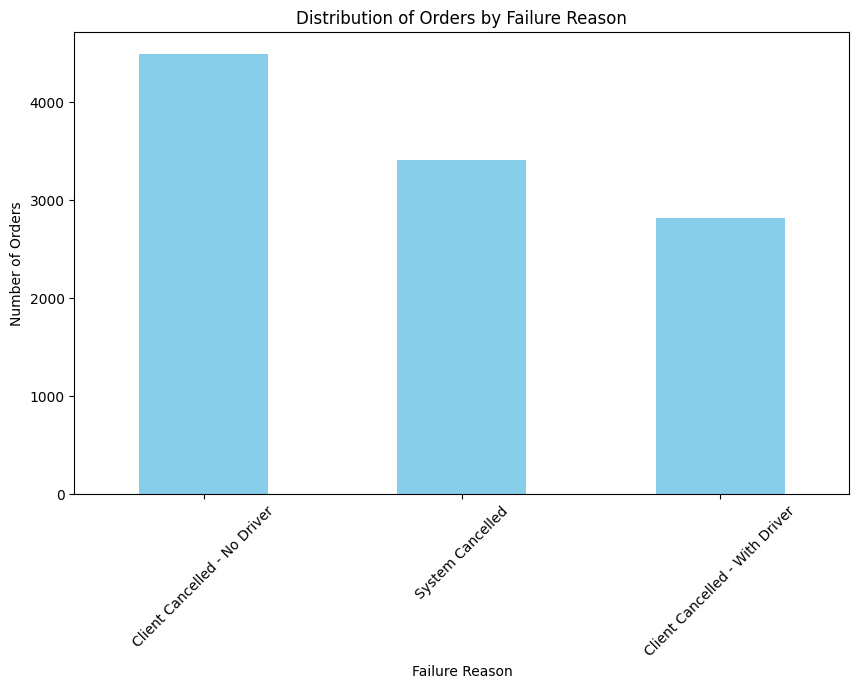

failure_reason
Client Cancelled - No Driver      4496
System Cancelled                  3409
Client Cancelled - With Driver    2811
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt

# Categorize the failure reasons
data_orders['failure_reason'] = data_orders.apply(
    lambda row: 'Client Cancelled - No Driver' if row['order_status_key'] == 4 and row['is_driver_assigned_key'] == 0 else
                'Client Cancelled - With Driver' if row['order_status_key'] == 4 and row['is_driver_assigned_key'] == 1 else
                'System Cancelled', axis=1)

# Calculate the distribution of orders by failure reason
failure_reason_distribution = data_orders['failure_reason'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
failure_reason_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders by Failure Reason')
plt.xlabel('Failure Reason')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

failure_reason_distribution


## Distribution of Failed Orders by Hour

Next, we will analyze the distribution of failed orders by hour to see if there's a trend of higher failure rates at certain hours.

Let's plot the distribution of failed orders by hour.


<Figure size 1500x800 with 0 Axes>

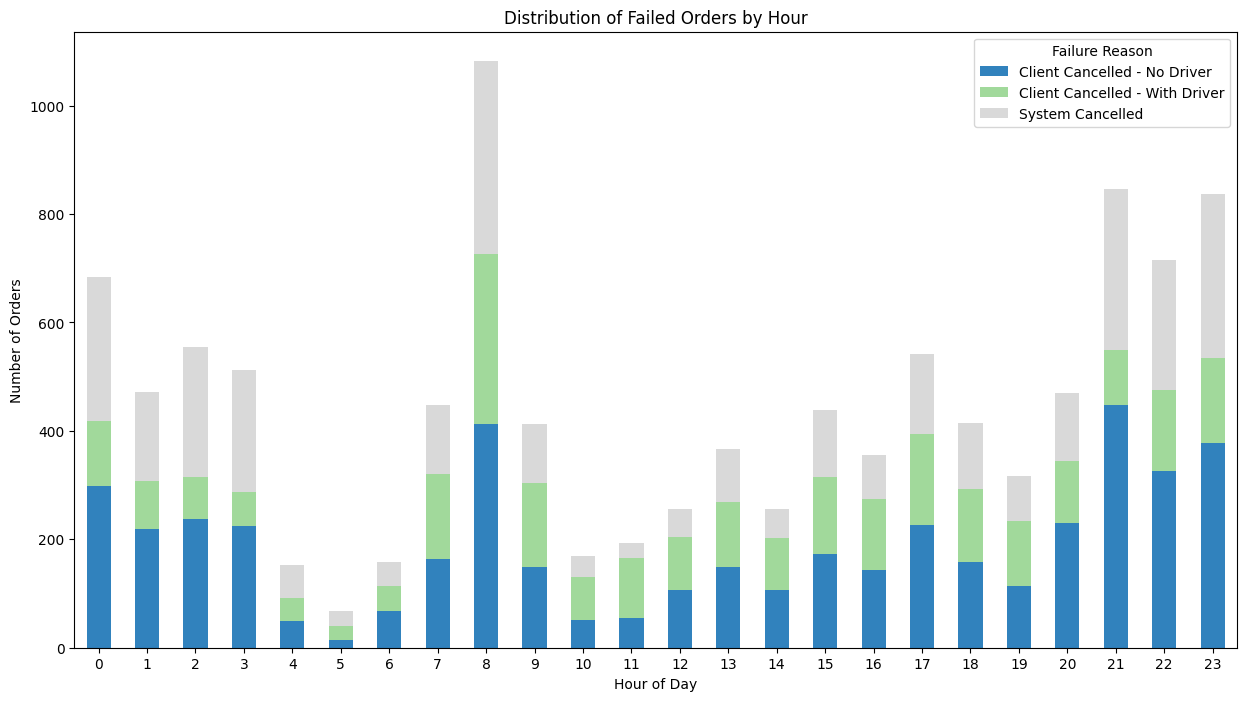

failure_reason,Client Cancelled - No Driver,Client Cancelled - With Driver,System Cancelled
order_hour,,,
0,298,120,265
1,219,88,164
2,237,78,240
3,224,64,225
4,50,41,61
5,15,25,27
6,67,47,45
7,164,156,127
8,413,314,355


In [11]:
# Convert order_datetime to datetime type and extract the hour
data_orders['order_hour'] = pd.to_datetime(data_orders['order_datetime'], format='%H:%M:%S').dt.hour

# Calculate the distribution of failed orders by hour for each failure reason
hourly_distribution = data_orders.groupby(['order_hour', 'failure_reason']).size().unstack(fill_value=0)

# Plot the distribution
plt.figure(figsize=(15, 8))
hourly_distribution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20c')
plt.title('Distribution of Failed Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Failure Reason')
plt.show()

hourly_distribution


## Average Time to Cancellation by Hour

We will plot the average time to cancellation with and without a driver, by the hour. Outliers will be removed to get a clearer picture.

Let's proceed with this analysis.


<Figure size 1500x800 with 0 Axes>

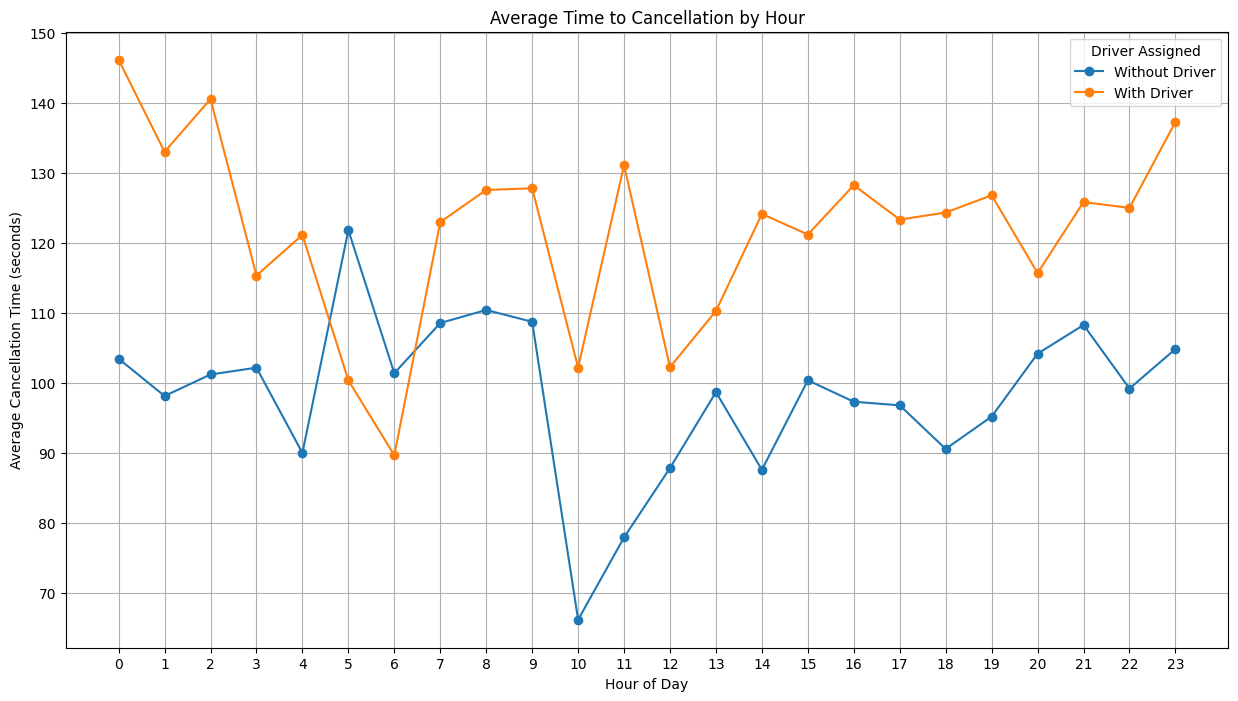

is_driver_assigned_key,0,1
order_hour,,
0,103.453925,146.131868
1,98.132420,132.985915
2,101.205128,140.527273
3,102.174888,115.326087
4,90.000000,121.125000
5,121.800000,100.368421
6,101.384615,89.675676
7,108.549383,122.962406
8,110.412346,127.540925


In [12]:
# Filter out outliers for cancellation time (considering values within 1.5 * IQR)
q1 = data_orders['cancellations_time_in_seconds'].quantile(0.25)
q3 = data_orders['cancellations_time_in_seconds'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_data_orders = data_orders[(data_orders['cancellations_time_in_seconds'] >= lower_bound) &
                                   (data_orders['cancellations_time_in_seconds'] <= upper_bound)]

# Calculate average time to cancellation by hour with and without driver
avg_cancellation_time = filtered_data_orders.groupby(['order_hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().unstack()

# Plot the average time to cancellation by hour
plt.figure(figsize=(15, 8))
avg_cancellation_time.plot(kind='line', marker='o', figsize=(15, 8))
plt.title('Average Time to Cancellation by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Cancellation Time (seconds)')
plt.legend(['Without Driver', 'With Driver'], title='Driver Assigned')
plt.xticks(range(24))
plt.grid(True)
plt.show()

avg_cancellation_time


## Distribution of Average ETA by Hour

Finally, we will plot the distribution of average Estimated Time of Arrival (ETA) by hour to see if there are any patterns.

Let's proceed with this analysis.


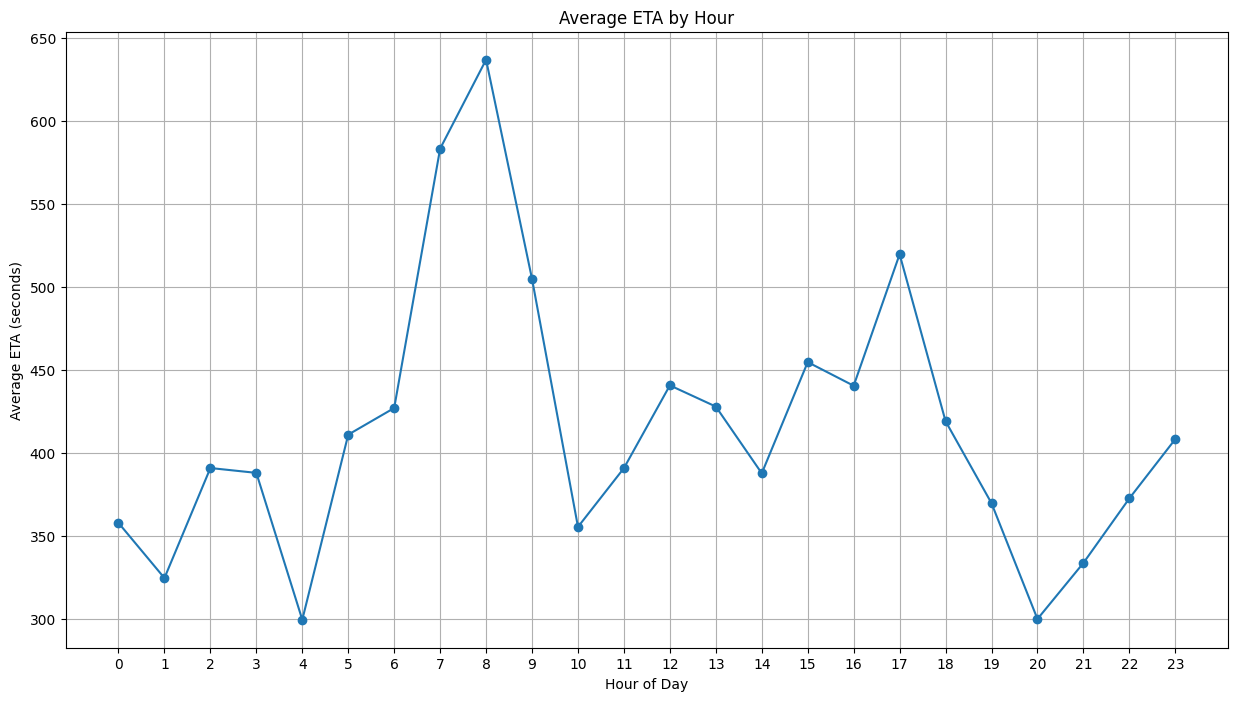

order_hour
0     357.959016
1     324.750000
2     391.012821
3     388.093750
4     299.658537
5     411.120000
6     427.148936
7     583.358974
8     636.910828
9     504.891026
10    355.556962
11    390.954955
12    440.787879
13    428.025000
14    387.835052
15    454.790210
16    440.568182
17    519.742515
18    419.186567
19    369.816667
20    300.096491
21    333.852941
22    372.744966
23    408.429487
Name: m_order_eta, dtype: float64

In [13]:
# Calculate the average ETA by hour
avg_eta_by_hour = data_orders.groupby('order_hour')['m_order_eta'].mean()

# Plot the average ETA by hour
plt.figure(figsize=(15, 8))
avg_eta_by_hour.plot(kind='line', marker='o')
plt.title('Average ETA by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average ETA (seconds)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

avg_eta_by_hour


## BONUS: Hexagon Mapping of Failed Orders

For the bonus task, we'll use the `h3` and `folium` packages to visualize the geographical distribution of failed orders. We'll calculate how many size 8 hexes contain 80% of all orders and visualize them on a map, colored by the number of failures.

Let's proceed with this analysis.


In [17]:
# Install necessary packages
!pip install h3 folium

import h3
import folium
import pandas as pd

# Load the data
data_orders = pd.read_csv('/content/data_orders.csv')

# Filter data for failed orders
failed_orders = data_orders[(data_orders['order_status_key'] == 4) | (data_orders['order_status_key'] == 9)]

# Define a function to get the h3 index for each order location
def get_h3_index(lat, lon, resolution=8):
    return h3.geo_to_h3(lat, lon, resolution)

# Add a new column for the h3 index
failed_orders['h3_index'] = failed_orders.apply(lambda row: get_h3_index(row['origin_latitude'], row['origin_longitude']), axis=1)

# Calculate the number of failed orders in each h3 hex
hex_failures = failed_orders['h3_index'].value_counts()

# Determine the number of hexes that contain 80% of the failed orders
cumulative_failures = hex_failures.cumsum()
total_failures = hex_failures.sum()
hexes_80_percent = cumulative_failures[cumulative_failures <= 0.8 * total_failures].index

# Create a folium map
m = folium.Map(location=[failed_orders['origin_latitude'].mean(), failed_orders['origin_longitude'].mean()], zoom_start=12)

# Add hexagons to the map, colored by the number of failures
for hex_index in hexes_80_percent:
    hex_boundary = h3.h3_to_geo_boundary(hex_index, geo_json=True)
    num_failures = hex_failures[hex_index]
    folium.Polygon(
        locations=hex_boundary,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f'Failures: {num_failures}'
    ).add_to(m)

# Save the map to an HTML file
map_path = 'failed_orders_hex_map.html'
m.save(map_path)



## Conclusion

In this project, we analyzed and visualized the reasons and patterns behind failed taxi orders for the Gett platform. The analysis focused on identifying the distribution of order failures, understanding the impact of time on cancellations, and examining the geographical distribution of these failures. Here are the key findings:

### Key Findings

1. **Distribution of Orders by Failure Reason**:
   - The highest number of failed orders occurred due to clients canceling before a driver was assigned, accounting for 4496 orders.
   - System cancellations (order rejections) and client cancellations after a driver was assigned accounted for 3409 and 2811 orders, respectively.

2. **Distribution of Failed Orders by Hour**:
   - The failure rate peaked around midnight (0:00) and again around 8:00 AM, which could be attributed to high demand during these hours.
   - There was a noticeable increase in failures during late evening hours (21:00 - 23:00).

3. **Average Time to Cancellation by Hour**:
   - Cancellations took longer when a driver was assigned, with average times ranging between 120 to 140 seconds.
   - Without a driver assigned, the average cancellation time generally fluctuated around 90 to 110 seconds, with dips during early morning hours.

4. **Distribution of Average ETA by Hour**:
   - The average ETA was lowest during early morning hours (0:00 - 6:00), fluctuating around 300 to 430 seconds.
   - There was a significant increase in average ETA during morning peak hours (7:00 - 9:00), peaking at over 600 seconds around 8:00 AM.
   - ETAs were moderate during the day and decreased again in the evening, typically staying below 400 seconds.

5. **Geographical Distribution of Failed Orders**:
   - Using H3 and Folium, we visualized the geographical distribution of failed orders.
   - Hexagons containing 80% of all failed orders were identified and mapped, highlighting areas with the highest failure rates.

### Recommendations

- **Demand Management**: Implement strategies to manage peak hour demand, particularly around midnight and early morning hours, to reduce client cancellations.
- **Driver Availability**: Ensure sufficient driver availability during peak times to improve order acceptance rates and reduce system cancellations.
- **ETA Optimization**: Work on optimizing ETAs during high-demand periods to enhance customer satisfaction and reduce cancellations.

By understanding these patterns and implementing the recommended strategies, Gett can improve its service reliability and customer satisfaction.

